# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import numpy as np

2024-03-16 15:09:12.931315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 15:09:12.931427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 15:09:13.080462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Let us load the mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train)))

(60000, 28, 28)
pixel range is [0,255]


We normalize the input in the range [0,1]

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

we need to change the shape of the data points to have 28*28 features which are the pixels of the image.

In [5]:
x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

The output of the network will be a proability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [6]:
print(y_train[0])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[0])
y_test_cat = utils.to_categorical(y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


This output says that for demonstrating the number "5", we need to have the corresponding value in the vector of 10 values to be equal to 1. Remember that, numbers in the dataset are 0 to 9. 

-----------

# FIRST NETWORK - Logistic Regression

Our first Netwok just implements logistic regression.

## Network Construction

Code Explanation:
- __Input(shape=(784))__ : This line defines an input layer for the neural network. The shape parameter specifies the shape of the input data. In this case, it's set to (784), which suggests that the input data is expected to be a vector of length 784. This is commonly used in scenarios like image classification where each image is represented as a 784-dimensional vector (e.g., a flattened 28x28 image).
- __Dense(10,activation='softmax')(xin)__ : This line defines a **fully connected (dense)** layer with **10 units** and a **softmax activation function**. The Dense layer connects every neuron in the previous layer (in this case, the input layer) to every neuron in the current layer. 
    - The softmax activation function is commonly used in the output layer of a classification model to obtain probabilities for each class. The output of this layer (res) represents the probabilities of the input belonging to each of the 10 classes.
- __Model(inputs=xin,outputs=res)__ : This line creates a Keras Model by specifying the inputs and outputs of the model. **xin** is specified as the input, and **res** (the output of the dense layer) is specified as the output. 
    - This essentially constructs a neural network model that takes inputs through the defined input layer, passes them through the dense layer, and outputs the resulting probabilities through the softmax activation.

In [7]:
xin = Input(shape=(784, ))  ## We should define the number of the input data
res = Dense(10,activation='softmax')(xin) 

mynet = Model(inputs=xin,outputs=res)

In [8]:
mynet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

__Summary__ explnation:
- It shows a summery of this created network.
- It says that the input layer consists of 784 input data which is equal to the number of features. 
    - The input layer does not have any parameter.
- The second layer which is a dense layer has 10 neurons. Having said that, __dense__ referes to a fully connected neural network. So, here, having 10 neurons gives us 10*784 parameters + bias. The number of __bias__ equals to the number of neurons, so for the second layer which consists of 10 neurons we also have 10 bias values for each neuron. Since, __bias__ is considered parameters that can be configured, it increases out parameters to 7840+10 number. 

## Compile and Train 

After writing the code you provided, the typical next steps would involve compiling the model, specifying the loss function and optimization algorithm, and then training the model on the data.

**Compiling the Model**: Before training the model, you need to compile it. Compiling the model configures it for training by specifying the loss function, the optimizer, and optional metrics. So, we need to pass two mandatory arguments:
*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
    - **optimizer='adam'**: This line specifies the Adam optimization algorithm, which is a popular choice for training neural networks due to its adaptive learning rate with momentum capabilities.
*   the **loss function**
    - **loss='categorical_crossentropy'**: This line specifies the loss function to optimize. __categorical_crossentropy__ is commonly used for the scenarios where we have categorical data as here. 
* Optionally, we can specify additional metrics, mostly meant for monitoring the training process.
    - This specifies that you want to track the accuracy of the model during training.

In [9]:
mynet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Training the Model:** After compiling the model, you can train it using the **fit** method by providing input data and corresponding target labels.

Fitting, just requires two arguments: training data and ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

In [18]:
history1 = mynet.fit(x_train, y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))
history1

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9317 - loss: 0.2434 - val_accuracy: 0.9259 - val_loss: 0.2638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9316 - loss: 0.2434 - val_accuracy: 0.9286 - val_loss: 0.2643
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9325 - loss: 0.2474 - val_accuracy: 0.9284 - val_loss: 0.2649
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9322 - loss: 0.2476 - val_accuracy: 0.9270 - val_loss: 0.2631
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9308 - loss: 0.2473 - val_accuracy: 0.9254 - val_loss: 0.2652
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9333 - loss: 0.2456 - val_accuracy: 0.9282 - val_loss: 0.2629
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9343 - loss: 0.2411 - val_accuracy: 0.9262 - val_loss: 0.2692
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9349 - loss: 0.2396 - 

## Another Network with 1 more layer
In the below code we have defined another network with one more Dense layer. We want to illustrate the impact of more layer on accuracy during the training.

In the below code you can see that we have provided more neurons in the second layer which gives us more parameters as it's described in the network summary. 


- We used __relu__ activation function for the second layer, and have used the __softmax__ activation function for the output layer as our output value is a categorical value.

#### Construction
Constructing the network:

In [11]:
xin = Input(shape=(784, ))
x = Dense(128,activation='relu')(xin) 
res = Dense(10,activation='softmax')(x)

mynet2 = Model(inputs=xin,outputs=res)

In [12]:
mynet2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
We compiled the network with the configuration same as the previous network.

In [13]:
mynet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Let's train it on the train data.

In [19]:
history2 = mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32, validation_data=(x_test,y_test_cat))
history2

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accuracy: 0.9784 - val_loss: 0.0778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9803 - val_loss: 0.0818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9790 - val_loss: 0.0842
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.9758 - val_loss: 0.0988
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9763 - val_loss: 0.1028
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9795 - val_loss: 0.0912
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9791 - val_loss: 0.1031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0053 -

The result shows an amazing improvement. WOW!

## 3-Layered Network
In the next cell we have created another network wich has:
- One more Dense layer
- Sigmoid activation function
- Adapted to work with Sparse Categorical Crossentropy

We have also plotted our network and its result.

In [15]:
xin = Input(shape=(784, ))
x = Dense(128,activation='relu')(xin)
x2 = Dense(128,activation='relu')(x)
res = Dense(10,activation='softmax')(x2)

mynet3 = Model(inputs=xin,outputs=res)
mynet3.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

**Change Explanation**:
- __Difference between Categorical Crossentropy and Sparse Categorical Crossentropy__
    - **Categorical Crossentropy:** This loss function is typically used when the target labels are one-hot encoded. 
        - One-hot encoding represents each class as a binary vector where only one element is nonzero, indicating the class index.
        - The output of the model is compared to the one-hot encoded target labels.
        - It calculates the cross-entropy loss between the predicted probabilities and the one-hot encoded target labels.
        - Suitable for multi-class classification tasks when the classes are mutually exclusive.
    - **Sparse Categorical Crossentropy:** This loss function is used when the target labels are integers, not one-hot encoded.
        - Instead of one-hot encoding, each target label is represented as an integer indicating the class index directly.
        - The output of the model is compared to the integer target labels.
        - It calculates the cross-entropy loss between the predicted probabilities and the integer target labels.
        - Convenient when you have a large number of classes, as it saves memory and computational resources by avoiding one-hot encoding.
        - It's especially useful when dealing with large datasets where one-hot encoding could lead to memory issues.
        
- __Other Activation functions__
    - There are several activation functions commonly used in neural networks, each with its own characteristics and suitability for different types of problems. Here are some of the most commonly used activation functions:
    1. **Sigmoid**: The sigmoid function squashes the input values between 0 and 1. It's commonly used in the output layer of binary classification problems where the goal is to predict probabilities.
$$\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}$$
    2. **ReLU (Rectified Linear Unit)**: ReLU sets all negative values to zero and leaves positive values unchanged. It's known for its simplicity and effectiveness in training deep neural networks.
$$\text{ReLU}(x) = \max(0, x)$$
    3. **Leaky ReLU**: Leaky ReLU is similar to ReLU but allows a small, positive gradient for negative input values, which can help with the vanishing gradient problem.
$$ \text{Leaky ReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha x, & \text{otherwise} \end{cases} $$
    4. **Tanh (Hyperbolic Tangent)**: Tanh squashes the input values between -1 and 1, making it zero-centered. It's often used in hidden layers of neural networks.
$$\text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
    5. **Softmax**: Softmax is used in the output layer of multi-class classification problems. It converts raw scores (logits) into probabilities that sum up to 1.
$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$$
    6. **Linear**: Linear activation simply outputs the input value without applying any transformation. It's often used in the output layer for regression tasks.
$$\text{Linear}(x) = x$$

In [16]:
mynet3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history3 = mynet3.fit(x_train, y_train, shuffle=True, epochs=10, batch_size=32, validation_data=(x_test,y_test))
history3

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9778 - val_loss: 0.0966
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9789 - val_loss: 0.1125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9959 - loss: 0.0119 - val_accuracy: 0.9807 - val_loss: 0.0954
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9774 - val_loss: 0.1174
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9790 - val_loss: 0.1051
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9778 - val_loss: 0.1190
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9966 - loss: 0.0094 - val_accuracy: 0.9792 - val_loss: 0.1262
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9963 - loss: 0.0112

## Plots
In a neural network project, there are several things you can plot to analyze and visualize various aspects of the model's performance and behavior. Here's a list of common plots along with code examples:

1. **Training and Validation Loss Curves**:
   - Plotting the loss values over epochs helps you monitor the training progress and check for overfitting or underfitting.
  

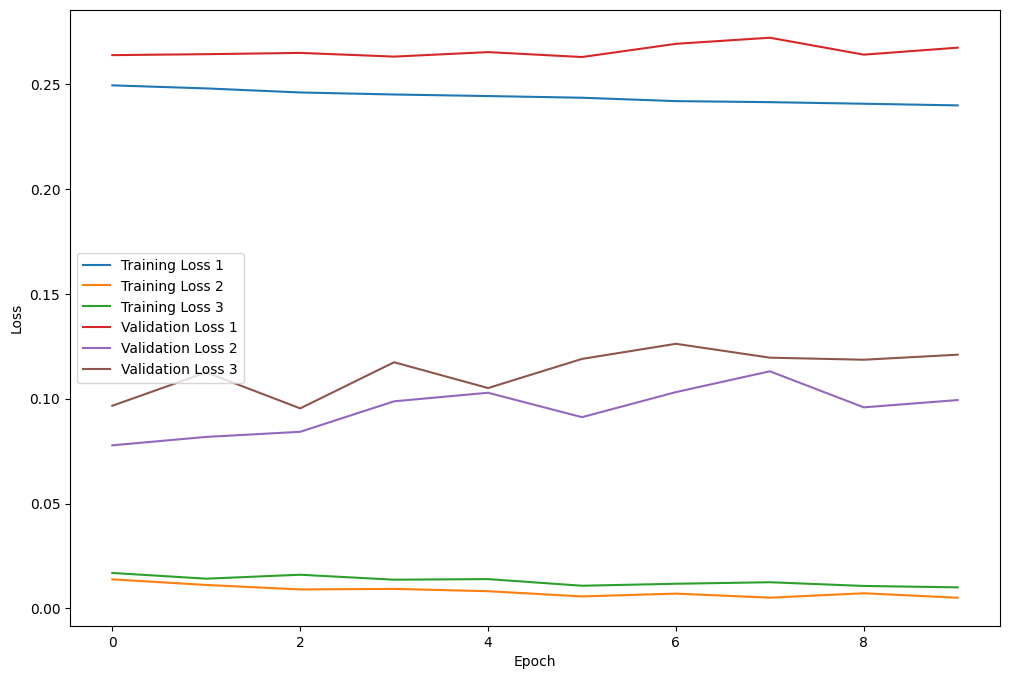

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(history1.history['loss'], label='Training Loss 1')
plt.plot(history2.history['loss'], label='Training Loss 2')
plt.plot(history3.history['loss'], label='Training Loss 3')
plt.plot(history1.history['val_loss'], label='Validation Loss 1')
plt.plot(history2.history['val_loss'], label='Validation Loss 2')
plt.plot(history3.history['val_loss'], label='Validation Loss 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


2. **Training and Validation Accuracy Curves**:
   - Plotting accuracy over epochs helps you evaluate the performance of the model during training and validation.

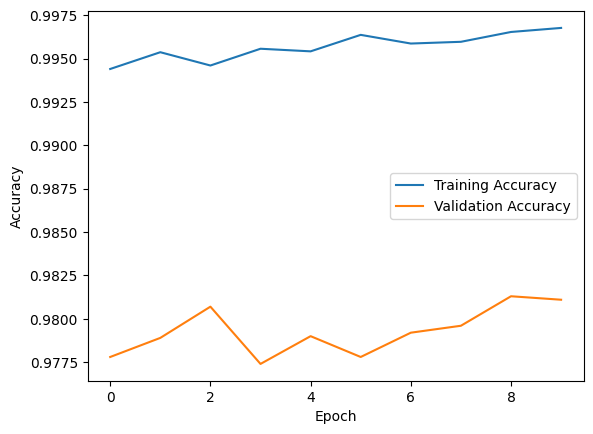

In [32]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


3. **Confusion Matrix**:
   - A confusion matrix helps you understand the model's performance in multi-class classification tasks.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


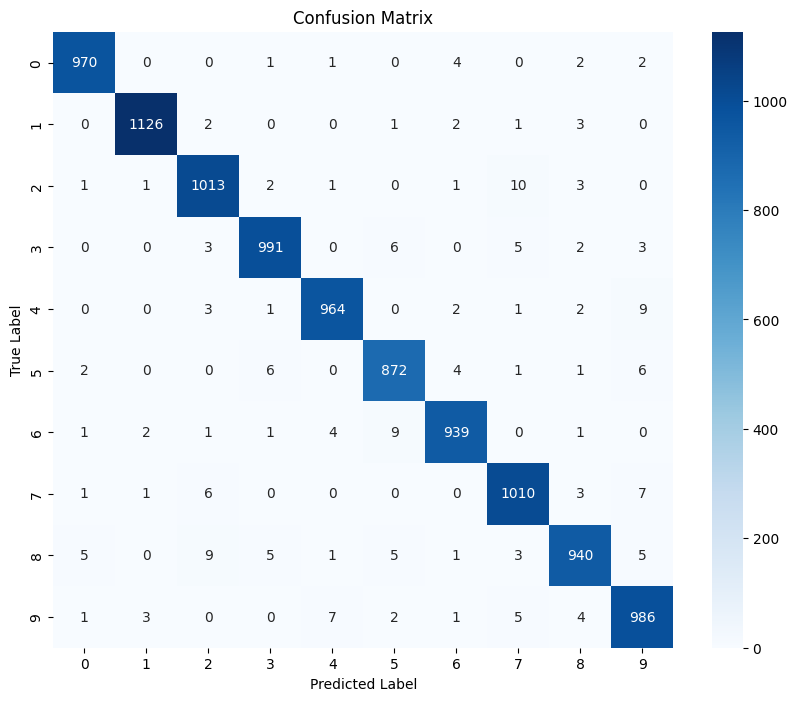

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = mynet3.predict(x_test)
cm = confusion_matrix(y_test, np.argmax(predictions, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


4. **ROC Curve and AUC** (for binary classification):
   - ROC curve and AUC (Area Under the Curve) are useful for evaluating binary classification models. So, for this problem we are not able to demonstrate it.

In [36]:
# from sklearn.metrics import roc_curve, auc

# fpr, tpr, _ = roc_curve(y_test, predictions)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

5. **Learning Rate Schedule**:
   - Plotting the learning rate schedule helps you visualize how the learning rate changes over time, especially if you're using a learning rate scheduler.
   
   - If you are using a learning rate scheduler or optimizer that dynamically adjusts the learning rate during training, you may not have a fixed learning rate value stored in the `history.history` dictionary. In such cases, you can check the learning rate value directly from the optimizer object. Here's how you can do it:

```python
# Get the learning rate from the optimizer
learning_rate = mynet.optimizer.learning_rate.numpy()

print("Current learning rate:", learning_rate)
```

In [46]:
# plt.plot(history1.history['lr'])
# plt.title('Learning Rate')
# plt.xlabel('Epoch')
# plt.ylabel('Learning Rate')
# plt.show()

# Get the learning rate from the optimizer
learning_rate = mynet.optimizer.learning_rate.numpy()

print("Current learning rate:", learning_rate)

Current learning rate: 0.001


End of this Project. The projects idea is taken from my teacher at my university. I have added more explanation and cells to complete this learning material.

Hope you enjoyed it! Cheers ;)